# Business Understanding

## Overview

Diabetes is a chronic condition that poses significant health risks if not managed properly. Early identification of high-risk patients is critical for timely intervention, which can help prevent the onset or progression of the disease. This project aims to develop a predictive model that healthcare providers can use to identify patients at high risk for diabetes. By accurately predicting which patients are at risk, healthcare providers can allocate resources more effectively and provide targeted care to those who need it most.



## Business problem

The primary business problem addressed in this project is the identification of high-risk patients for diabetes within a healthcare setting. Early detection is crucial for preventing serious complications, reducing healthcare costs, and improving patient outcomes. The challenge lies in accurately identifying these high-risk individuals from a larger population where the majority may not be at immediate risk.


Key challenges include:

* Imbalanced Data: The proportion of patients at high risk for diabetes is relatively small compared to the general population, which can make it challenging for models to detect these cases without generating a high number of false positives.

* Accuracy vs. False Positives: Striking a balance between correctly identifying high-risk patients (sensitivity) and minimizing false alarms (specificity) is essential to ensure that healthcare resources are allocated efficiently without causing unnecessary stress or interventions for patients who are not at risk.

## Data Understanding

The dataset used in this project comes from a collection of patient records related to diabetes. It includes various health indicators that are crucial for predicting the likelihood of a patient being at high risk for developing diabetes. The dataset provides a comprehensive view of patient health, allowing us to build a predictive model to identify those at risk.

Features:
The dataset consists of several key features that contribute to the prediction of diabetes risk:

* Pregnancies: The number of times the patient has been pregnant. This is a relevant factor in assessing the risk of diabetes, particularly gestational diabetes.

* Glucose: Plasma glucose concentration after 2 hours in an oral glucose tolerance test. High glucose levels are a strong indicator of diabetes.

* Blood Pressure: Diastolic blood pressure (mm Hg). Elevated blood pressure is often associated with diabetes and cardiovascular risk.

* Skin Thickness: Triceps skinfold thickness (mm). This measurement can help assess body fat, which is a risk factor for diabetes.

* Insulin: 2-hour serum insulin (mu U/ml). Insulin levels provide insight into how the body is processing glucose.

* BMI: Body Mass Index, calculated as weight in kg/(height in m)^2. BMI is a critical indicator of obesity, a major risk factor for diabetes.

* Diabetes Pedigree Function: A function that scores the likelihood of diabetes based on family history and genetic factors.

* Age: The age of the patient. The risk of developing diabetes increases with age.

* Outcome: The target variable, where 1 indicates the patient has diabetes and 0 indicates they do not.

### Objective

The goal is to build a classification model that can accurately identify high-risk patients for diabetes, allowing for early intervention and better resource allocation in healthcare. The model should balance sensitivity and specificity to ensure that high-risk patients are correctly identified while minimizing false positives.






## Data Preparation
We first import the necessary libraries and load our dataset.

In [110]:
#Loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')

#prints the first 15 rows 
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [111]:
#Prints the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [112]:
#Checking for missing values in our data

"""
After inspecting we found that our data has no missing values

"""
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Exploratory Data Analysis (EDA)
In this step, we will perform exploratory data analysis to understand our dataset better.We will also look at the target variable , it's distribution and correlation with the feature variables.

In [113]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [114]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [115]:
#We inspect our target variable
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [116]:
"""

We now know our target variable has a total of 768 entries. 
The 'Outcome' column is a binary variable, where a value of 1 indicates that the patient has diabetes, and a value of 0 indicates that the patient does not have diabetes.

"""

"\n\nWe now know our target variable has a total of 768 entries. \nThe 'Outcome' column is a binary variable, where a value of 1 indicates that the patient has diabetes, and a value of 0 indicates that the patient does not have diabetes.\n\n"

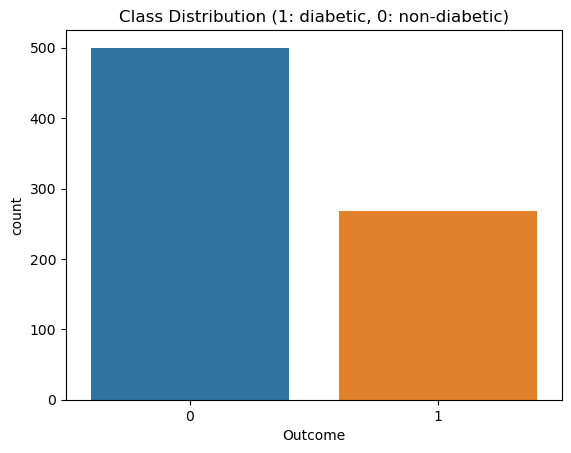

In [117]:
# Plotting the class distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (1: diabetic, 0: non-diabetic)')
plt.show()

In [118]:
"""

From our plot , we could tell that from the dataset, few people were diagnosed with diabetes.

"""

'\n\nFrom our plot , we could tell that from the dataset, few people were diagnosed with diabetes.\n\n'

## Data Prepocessing
Before building our model, we need to preprocess the data. This involves standardizing features, handling class imbalance, and splitting the data into features and target variables.

In [119]:
#Defining our feature variable and our target variable X and y

X = df.drop(columns='Outcome',axis=1)
y = df['Outcome']

In [120]:
correlation = X.corrwith(y)
correlation

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
dtype: float64

In [121]:
"""
 From the above,glucose is the most strongly correlated feature with the outcome, making it a key predictor for whether a patient has diabetes.
 BMI and Age also show a positive correlation, indicating they are useful predictors but less influential than Glucose.
 Insulin shows a slight negative correlation, which might be weakly associated with not having diabete

"""

'\n From the above,glucose is the most strongly correlated feature with the outcome, making it a key predictor for whether a patient has diabetes.\n BMI and Age also show a positive correlation, indicating they are useful predictors but less influential than Glucose.\n Insulin shows a slight negative correlation, which might be weakly associated with not having diabete\n\n'

In [122]:
from imblearn.over_sampling import SMOTE


# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

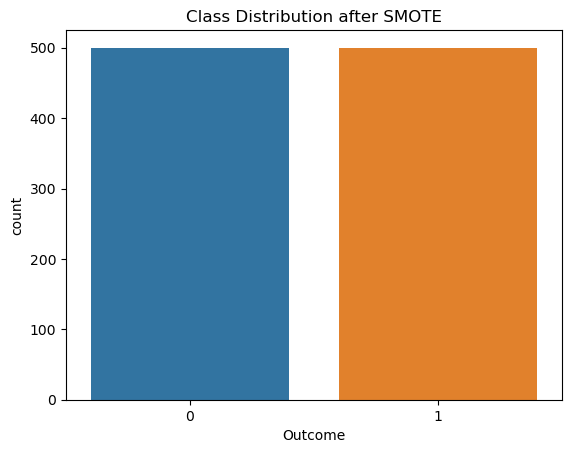

In [123]:
# Check new class distribution after resampling
sns.countplot(x=y_res)
plt.title('Class Distribution after SMOTE')
plt.show()


In [124]:
#Performing a train-test split on our data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [125]:
#Scaling our feature variable
from sklearn.preprocessing import StandardScaler

#Instantating 'scaler' 
scaler = StandardScaler()

#We fit on the training data only
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Building a Model : Logistic Regression

In [126]:
#importing the LogisticRegression module
from sklearn.linear_model import LogisticRegression

#Instantiating log_reg

log = LogisticRegression()

#fitting the model

log.fit(X_train,y_train)


# Making the predictions with our model
log_pred = log.predict(X_test)


In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, f1_score

print("Logistic Regression Metrics:")
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))


Logistic Regression Metrics:
[[120  31]
 [ 30  50]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [128]:
# Calculate ROC-AUC
roc_auc_log = roc_auc_score(y_test, log.predict_proba(X_test)[:, 1])
print(f"Logistic Regression ROC-AUC: {roc_auc_log:.2f}")

Logistic Regression ROC-AUC: 0.80


## Model 2 : Decision tree (Hyperparameter tuning)



In [129]:
from sklearn.tree import DecisionTreeClassifier

#Instantiating 'tree'
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

#making prediction
tree_pred = tree.predict(X_test)

# Evaluate the model
print("\nDecision Tree Metrics (Default Parameters):")
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test,tree_pred))



Decision Tree Metrics (Default Parameters):
[[107  44]
 [ 24  56]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       151
           1       0.56      0.70      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.71       231



In [130]:
# Tune the hyperparameters
tree_tuned = DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)
tree_tuned.fit(X_train, y_train)


# Make predictions with the tuned model
tree_pred_tuned = tree_tuned.predict(X_test)


# Evaluate the tuned model
print("\nDecision Tree Metrics (Tuned Parameters):")
print(confusion_matrix(y_test,tree_pred_tuned))
print(classification_report(y_test,tree_pred_tuned))



Decision Tree Metrics (Tuned Parameters):
[[104  47]
 [ 20  60]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       151
           1       0.56      0.75      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



In [131]:
# Calculate ROC-AUC for tuned model
roc_auc_tree_tuned = roc_auc_score(y_test, tree_tuned.predict_proba(X_test)[:,1])
print(f"Decision Tree ROC-AUC (Tuned): {roc_auc_tree_tuned:.2f}")

Decision Tree ROC-AUC (Tuned): 0.74


## Model 3 : Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
pred_rf = rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Metrics:")
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))



Random Forest Metrics:
[[122  29]
 [ 27  53]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



In [133]:
# Calculate ROC-AUC
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")

Random Forest ROC-AUC: 0.80


### Comparing Accuracy Scores

In [134]:
# Compare accuracy scores
log_reg_acc = accuracy_score(y_test,log_pred)
tree_tuned_acc = accuracy_score(y_test, tree_pred_tuned)
rf_acc = accuracy_score(y_test,pred_rf)

print(f"Logistic Regression Accuracy: {log_reg_acc:.2f}")
print(f"Decision Tree Accuracy (Tuned): {tree_tuned_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

Logistic Regression Accuracy: 0.74
Decision Tree Accuracy (Tuned): 0.71
Random Forest Accuracy: 0.76


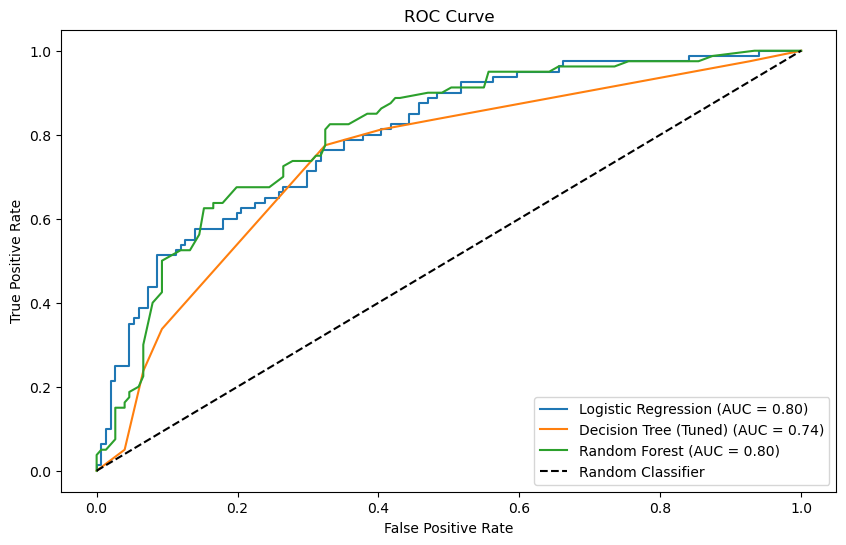

In [135]:
# Plotting ROC Curve for all models
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log.predict_proba(X_test)[:,1])
fpr_tree_tuned, tpr_tree_tuned, _ = roc_curve(y_test, tree_tuned.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_tree_tuned, tpr_tree_tuned, label=f'Decision Tree (Tuned) (AUC = {roc_auc_tree_tuned:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()